In [3]:
import pandas as pd
import numpy as np
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB


In [5]:
#importing data sheets using panda library
test = pd.read_csv("mnist_test.csv")
data = pd.read_csv("mnist_train.csv")
data

In [8]:
data.describe()
# viewing the data discriptiopn

,class,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,16.16,16.17,16.18,21.1,16.19,16.20,16.21,16.22,16.23,21.2
count,59999.000000,59999.0,59999.0,59999.0,59999.0,59999.0,59999.0,59999.0,59999.0,59999.0,...,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.0,59999.0,59999.0,59999.0
mean,4.453924,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200437,0.088868,0.045634,0.019284,0.015117,0.002000,0.0,0.0,0.0,0.0
std,2.889294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042522,3.956222,2.839868,1.686784,1.678297,0.346603,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [7]:
y = data['class']
X = data.drop(columns=['class'])
X
# eliminating class coloumn to prevent constant values across all images in the dataset.
# This features has no effect on the target, so it is good to remove these features.

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,16.16,16.17,16.18,21.1,16.19,16.20,16.21,16.22,16.23,21.2
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
X = X/255 #Normalisation

In [19]:
def show_me(X):
    plt.imshow(X.reshape(28,28))
    #reshaping to 28x28

In [20]:
def accuracy(y,y_hat):
    return np.mean(y==y_hat)
# ratio of predictions classified as correct to all predictions

In [21]:
def show_me_allmean(X,y,k):
    show_me(sum(X[y==k,:]/len(X[y==k,:])))
    # mean is calculated to summerize the distribution of the data, for each class
    # where k is the test size

In [32]:
X[0]


# conerting 59999 images with 784 pixel into  28x28 pixel format
# the rows reprecents the number of images
# the zeros reprecents the colour of the pixel

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

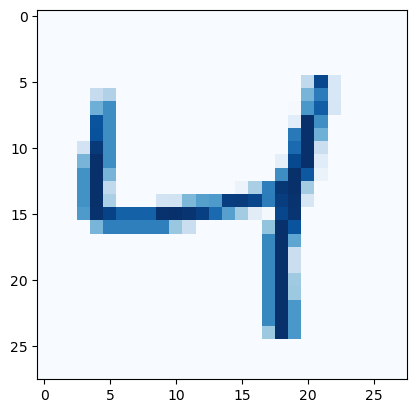

In [31]:
plt.imshow(X[1].reshape((28,28)), cmap = 'Blues')
# show how the digits from 0-9 looks like

In [24]:
X = X.to_numpy()
#to store data(ie row value)

In [46]:
y = y.to_numpy()
# to store target values(ie displayed values)

In [47]:


GB = GaussianNB()   # Build gaussian naive bayes model
GB.fit(X,y)     #fit the gaussian Naive bayes model on the training data
print(GB)

GaussianNB()


In [48]:
y_hat_GB = GB.predict(X) 

# prediction of data

In [49]:
y_acc = accuracy(y, y_hat_GB)
y_acc

0.5649260821013684

In [50]:
#obtaining test set data
test

,class,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9995,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
y_test = test['class']
X_test = test.drop(columns=['class'])
X_test
#eliminating class coloumn to prevent constant values across all images in the dataset

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
X_test = X_test.to_numpy()
# stores data


In [53]:
y_test = y_test.to_numpy()
# stores target values

In [54]:
X_test = X_test/255 #Normalisation

In [55]:
y_test


array([2, 1, 0, ..., 4, 5, 6])

In [56]:
#fitting  the Gaussian Naive Bayes model with test data
GNB = GaussianNB()
GNB.fit(X_test,y_test)


GaussianNB()

In [57]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [58]:
y_hat_GNB = GNB.predict(X) #Prediction y_hat

In [59]:
accuracy(y,y_hat_GNB)

0.5678594643244054

In [117]:
y_test
# real target(actual)

array([2, 1, 0, ..., 4, 5, 6])

In [118]:
y_hat_GB_test = GB.predict(X_test)
#predicted output by passing X_test

In [119]:
y_hat_GNB_test = GNB.predict(X_test)

In [120]:
accuracy(y_test,y_hat_GB_test)

0.5558555855585559

In [121]:
accuracy(y_test,y_hat_GNB_test)

0.5737573757375738

Text(0.5, 14.722222222222216, 'Predicted label')

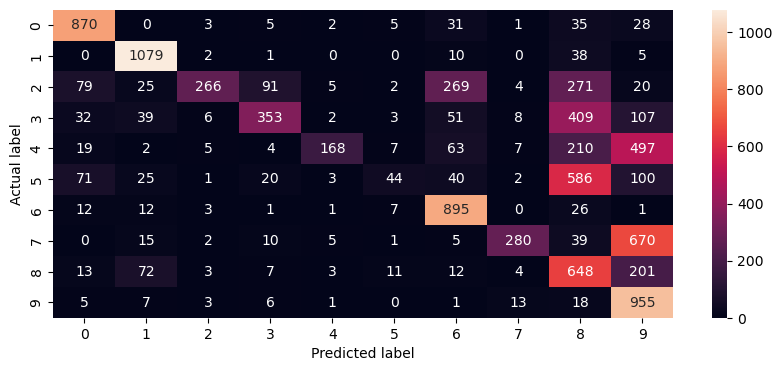

In [130]:
#making confusion matrix using sklearn and seaborn library
plt.figure(figsize=(10,4))
y_act = pd.Series(y_test, name = 'Actual')
y_pred = pd.Series(y_hat_GB_test, name = 'Predicted')
Confusion_matrix = pd.crosstab(y_act, y_pred)
ax = sns.heatmap(Confusion_matrix, annot=True, fmt = "d")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [123]:
np.diag(Confusion_matrix) # diagnol element for the confusion matrix

array([ 870, 1079,  266,  353,  168,   44,  895,  280,  648,  955])

In [124]:
Confusion_matrix.sum()  #  calculating the predictions correct predictions


Predicted
0    1101
1    1276
2     294
3     498
4     190
5      80
6    1377
7     319
8    2280
9    2584
dtype: int64

In [125]:
Confusion_matrix.sum().sum() # total sum of testing images

9999

In [126]:
accuracy = np.diag(Confusion_matrix).sum()/Confusion_matrix.sum().sum()
accuracy
# overoll accuracy from confusion matrix

0.5558555855585559

In [ ]:
# many of the data does not guarantee a high value of accuracy